In [15]:
from function.us_stock import *

In [7]:
from function.us_stock import get_intraDay_data_today, get_intraDay_data_7day, get_intraDay_data_6month
from datetime import datetime, timedelta
import os
stock_symbol='TSLA'
csv_name= '盤中資料'

stock_data = get_intraDay_data_today(stock_symbol)
# stock_data = get_intraDay_data_7day(stock_symbol)
# stock_data = get_intraDay_data_6month(stock_symbol)

current_date = datetime.now().strftime('%Y%m%d')

# Create directory structure
output_directory = os.path.join('DATA', current_date, stock_symbol)
os.makedirs(output_directory, exist_ok=True)

# Save data to CSV file
file_path = os.path.join(output_directory, f'{csv_name}.csv')
stock_data.to_csv(file_path)


[*********************100%%**********************]  1 of 1 completed


In [2]:
from function.us_stock import download_stock_data
download_stock_data(['AAPL','TSLA','META'])

抓取資料: AAPL
抓取資料: TSLA
抓取資料: META


[]

In [ ]:
import pandas as pd

url = 'https://finance.yahoo.com/screener/predefined/most_actives?count=100&offset=0'
data = pd.read_html(url)[0]

# 欄位『Symbol』就是股票代碼
stk_list = data.Symbol
stk_list

0     TSLA
1     PLTR
2     AMZN
3     NVDA
4     SOFI
5        F
6     SBSW
7     MARA
8      BAC
9      AMD
10    RIVN
11      LU
12    PLUG
13    AAPL
14     NIO
15    INTC
16    UBER
17      NU
18    VALE
19      IQ
20     PFE
21       T
22     CCL
23     AAL
24     AEO
Name: Symbol, dtype: object

In [4]:
from function.us_stock import download_financial_data
download_financial_data(['AAPL','TSLA','META'])

processing: AAPL
processing: TSLA
processing: META


[]

In [9]:
import numpy as np
import pandas as pd
import talib
# 透過『get_functions』語法，查看 TA-Lib 提供的所有技術指標的代碼
all_ta_label = talib.get_functions()
# 看一下清單
all_ta_label
# 共有 158 個技術指標可以運算
print(all_ta_label)

['HT_DCPERIOD', 'HT_DCPHASE', 'HT_PHASOR', 'HT_SINE', 'HT_TRENDMODE', 'ADD', 'DIV', 'MAX', 'MAXINDEX', 'MIN', 'MININDEX', 'MINMAX', 'MINMAXINDEX', 'MULT', 'SUB', 'SUM', 'ACOS', 'ASIN', 'ATAN', 'CEIL', 'COS', 'COSH', 'EXP', 'FLOOR', 'LN', 'LOG10', 'SIN', 'SINH', 'SQRT', 'TAN', 'TANH', 'ADX', 'ADXR', 'APO', 'AROON', 'AROONOSC', 'BOP', 'CCI', 'CMO', 'DX', 'MACD', 'MACDEXT', 'MACDFIX', 'MFI', 'MINUS_DI', 'MINUS_DM', 'MOM', 'PLUS_DI', 'PLUS_DM', 'PPO', 'ROC', 'ROCP', 'ROCR', 'ROCR100', 'RSI', 'STOCH', 'STOCHF', 'STOCHRSI', 'TRIX', 'ULTOSC', 'WILLR', 'BBANDS', 'DEMA', 'EMA', 'HT_TRENDLINE', 'KAMA', 'MA', 'MAMA', 'MAVP', 'MIDPOINT', 'MIDPRICE', 'SAR', 'SAREXT', 'SMA', 'T3', 'TEMA', 'TRIMA', 'WMA', 'CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3OUTSIDE', 'CDL3STARSINSOUTH', 'CDL3WHITESOLDIERS', 'CDLABANDONEDBABY', 'CDLADVANCEBLOCK', 'CDLBELTHOLD', 'CDLBREAKAWAY', 'CDLCLOSINGMARUBOZU', 'CDLCONCEALBABYSWALL', 'CDLCOUNTERATTACK', 'CDLDARKCLOUDCOVER', 'CDLDOJI', 'CDLDOJISTAR',

C:\Users\shccg\AppData\Local\Temp\ipykernel_16020\3840693775.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{y.index[-1].strftime('%Y-%m-%d')}\n\n開:{y.Open[-1]}\n收:{y.Close[-1]}\n高:{y.High[-1]}\n低:{y.Low[-1]}\n量:{y.Volume[-1]}\n幅:{round(((y.Close/y.Close.shift())[-1]-1)*100,2)} %",
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not fou

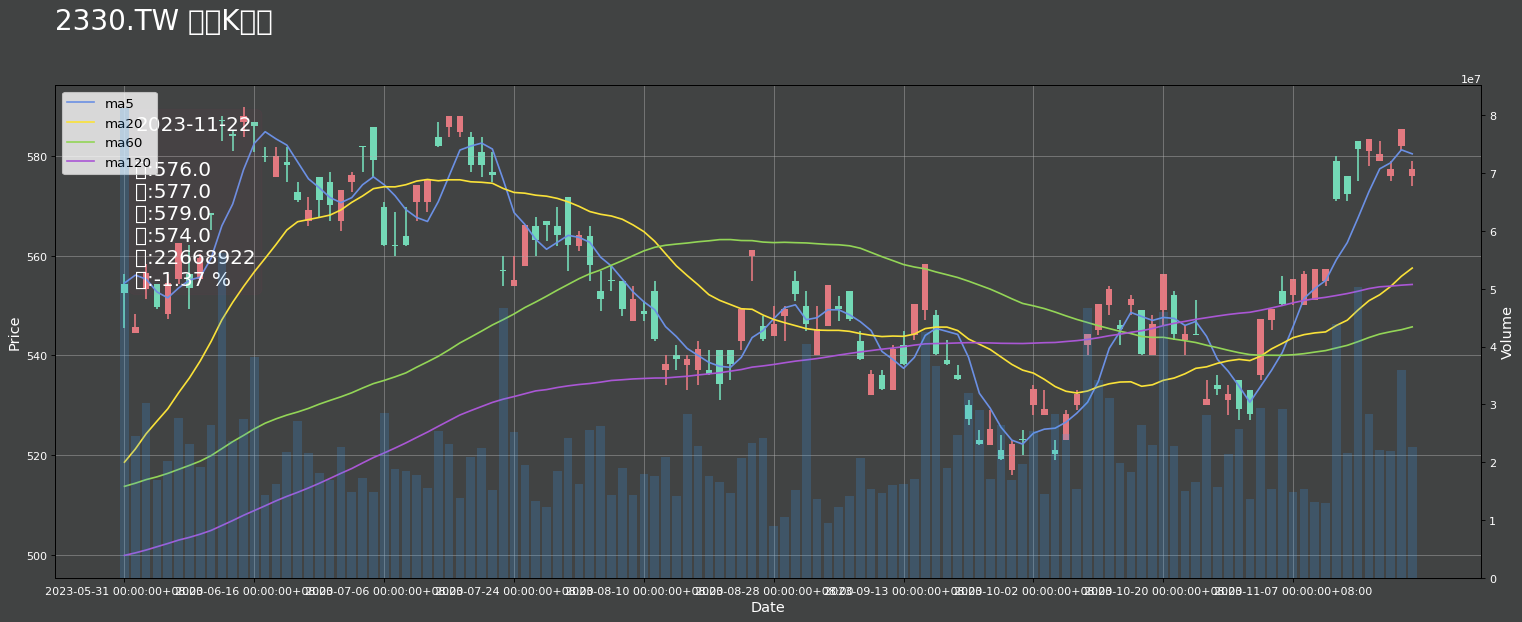

In [2]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

# 使用中文字體
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

stock_id = '2330.TW'
ohlcv = yf.Ticker(stock_id).history(period='max')

x = ohlcv.tail(120).index.astype(str)
y = ohlcv.tail(120)

def ma(n):
    return ohlcv.Close.rolling(n).mean().tail(120)

fig,ax = plt.subplots(figsize=(23,8),dpi=80,facecolor='#414343')

ax.set_facecolor('#414343')
ax.bar(x,y.Close-y.Open*0.9995,0.6,y.Open,color=['#e27980' if x>0 else '#73d9b6' for x in y.Close-y.Open])
ax.vlines(x,y.Low,y.High,color=['#e27980' if x>0 else '#73d9b6' for x in y.Close-y.Open])
for n,color in zip([5,20,60,120],['#6b90e4','#fae239','#93d557','#aa57d5']):
    ax.plot(x,ma(n),color=color,label=f"ma{n}")

ax2 = ax.twinx()
ax2.bar(x,y.Volume,color='#39a1fa',alpha=.2)

ax.set_title(f"{stock_id} 個股K線圖",fontsize=25,color='w',loc='left',y=1.1)
ax.set_xlabel('Date',fontsize=13,color='w')
ax.set_ylabel('Price',fontsize=13,color='w')
ax2.set_ylabel('Volume',fontsize=13,color='w')
ax.tick_params('x',labelcolor='w')
ax.tick_params('y',labelcolor='w')
ax2.tick_params('y',labelcolor='w')

ax.text(x[1],y.Close.mean(),
        f"{y.index[-1].strftime('%Y-%m-%d')}\n\n開:{y.Open[-1]}\n收:{y.Close[-1]}\n高:{y.High[-1]}\n低:{y.Low[-1]}\n量:{y.Volume[-1]}\n幅:{round(((y.Close/y.Close.shift())[-1]-1)*100,2)} %",

color='w',fontsize=18,bbox=dict(boxstyle='round',ec='#fa397708',fc='#fa397708'))

ax.legend(fontsize=12,loc='upper left')
ax.set_xticks(np.arange(0,len(x),len(x)/10))
ax.grid('-',alpha=.5)

plt.show()

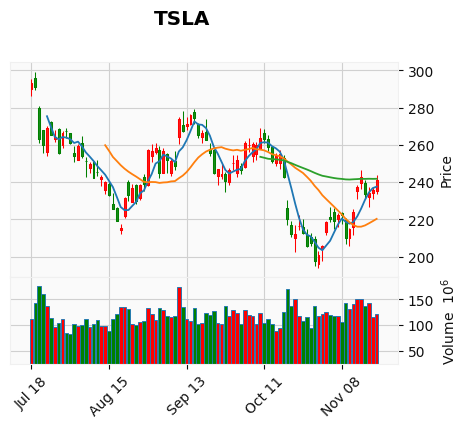

In [5]:
plot_stock_chart('TSLA',90)

In [34]:

translate_and_save('./20231122/AAPL/現金流量表_AAPL.csv')